# demonstration of `derivedDataFunctions`module
#### Davyd_Betchkal@nps.gov, 05/15/2017
#### repository for `derivedDataFunctions` here;  https://github.com/dbetchkal/derivedDataFunctions/tree/master

---

### for this code to work, you must download *derivedDataFunctions.py* and place it in the same directory as the notebook file


In [1]:
import soundDB
import iyore
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from derivedDataFunctions import *  

ds = iyore.Dataset(r"K:\AKRO Soundscape Data") # change this path, keep the 'r' in front

### you can get documentation on any function in this way:
(see the GitHub repository for the full function list:  https://github.com/dbetchkal/derivedDataFunctions/tree/master)

In [24]:
help(quantile_NFI)

Help on function quantile_NFI in module derivedDataFunctions:

quantile_NFI(srcid, q, source='all', unit='hours')
    Returns the average NFI for selected source type.
    
    Parameters
    ----------
    srcid: str, a single site specifier in the format "UNITSITEYYYY"
    q: float, a value that indicates the quantile desired, from 0.0 (minimum) to 1.0 (maximum.)   
    source: str or float, optional.  Which subset of srcid codes to summarize - choose either "all", "air", or specify a specific srcID code as a float.  Defaults to "all" if unspecified.
    unit: str, a value that indicates the units desired for the output value.  Defaults to "hours".
    
    Returns
    -------
    numpy.float64



In [37]:
srcid = soundDB.srcid(ds, site="NIZI").combine() # load a srcid file that has both aircraft and snowmachines

quantile_NFI(srcid, 0.5) # default units are hours
# quantile_NFI(srcid, 0.5, unit="minutes") # but we can change it to minutes
# quantile_NFI(srcid, 0.5, unit="minutes", source="air") # say we want the average time between aircraft
# quantile_NFI(srcid, 0.5, unit="minutes", source=4.1) # or just between snowmachines

100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 33.33entries/s]


0.54041666666666677

In [56]:
# we can use iyore to get the sites that have data for each type:
ds.srcid.values("site")

# this code gives you the mean NFI for all sites considering only aviation sources:
NFIs = [(entry.unit + entry.site, mean_NFI(srcid, source="air")) for entry, srcid in soundDB.srcid(ds, site=ds.nvspl.values("site"))]

# you might get some error messages - that's OK

Error while parsing "K:\AKRO Soundscape Data\2010 KATM002 Brooks Camp Generators\02 ANALYSIS\SPL Analysis\SRCID_KATM002.txt":
Traceback (most recent call last):
  File "C:\Users\DBetchkal\AppData\Local\Continuum\Anaconda3\envs\soundDB\lib\site-packages\soundDB\accessor.py", line 499, in iterate
    data = self.parse(entry, state= state) if state is not None else self.parse(entry)
  File "C:\Users\DBetchkal\AppData\Local\Continuum\Anaconda3\envs\soundDB\lib\site-packages\soundDB\parsers.py", line 260, in parse
    parse_dates= False)
  File "C:\Users\DBetchkal\AppData\Local\Continuum\Anaconda3\envs\soundDB\lib\site-packages\pandas\io\parsers.py", line 562, in parser_f
    return _read(filepath_or_buffer, kwds)
  File "C:\Users\DBetchkal\AppData\Local\Continuum\Anaconda3\envs\soundDB\lib\site-packages\pandas\io\parsers.py", line 325, in _read
    return parser.read()
  File "C:\Users\DBetchkal\AppData\Local\Continuum\Anaconda3\envs\soundDB\lib\site-packages\pandas\io\parsers.py", line 81

In [57]:
# when I ran this I noticed both my minimum and maximum values appear to be erroneous...  ...that was helpful!
NFIs

[('DENA7MIL', 2.6528129395218008),
 ('DENATOKO', 0.72491401112797171),
 ('DENABASE', 0.39355067410506739),
 ('DENAMBAR', 1.3945810457516339),
 ('DENATOKO', 0.61658099688473511),
 ('DENAUEFK', 0.52100170701427684),
 ('DENACARB', 11.836917249417247),
 ('DENAFOGG', 0.91700971463266545),
 ('DENAHEAL', 3.4534455207815871),
 ('DENAMULD', 3.0605037957211874),
 ('DENARUGL', 0.49415755919854282),
 ('DENAWFYR', 1.0800152329749106),
 ('DENABEAR', 3.8629590017825319),
 ('DENABLCR', 1.0989036113276176),
 ('DENACATH', 1.7591599642537983),
 ('DENACHCR', 3.7422361111111111),
 ('DENAHIDR', 1.2266517138256268),
 ('DENAKAHP', 0.53544379340277781),
 ('DENALEFK', 1.9071630045192458),
 ('DENALELD', 3.1793106291222735),
 ('DENAMcLE', 1.7096734693877551),
 ('DENAPICA', 1.0335355902777779),
 ('DENAHICR', 13.889183333333333),
 ('DENATKAH', 1.8914454732510291),
 ('DENATOKO', 0.76627937485740361),
 ('DENAUPWC', 1.4312785185185184),
 ('DENAUSLC', 1.1163589967920677),
 ('DENACEAK', 2.6897967479674798),
 ('DENAHERI'

In [58]:
help(L90)

Help on function L90 in module derivedDataFunctions:

L90(metrics, season='Summer', weight='A')
    Returns the sound pressure level that was exceeded during 90% of the sampling period.  The 10th percentile SPL.
    
    Parameters
    ----------
    metrics: str, a single site specifier in the format "UNITSITEYYYY"
    season: the season for which the metric is desired:  "Summer", "Fall", "Winter", "Spring" all case-sensitive.  Defaults to "Summer".
    weight: str, optional.  The acoustic weighting used to calculate Lmax, either "A" or "T". Defaults to "A" if unspecified.  
    
    Returns
    -------
    formatted float



In [42]:
L90(soundDB.metrics(ds, site="WEKH").combine())

100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.65entries/s]


17.3


# More cookbook recipes...

In [62]:
# a quick way to reference site names (if your folder structure has them)
decoder = {entry.site: entry.name for entry, srcid in soundDB.srcid(ds)}

# for me this spits back errors for every site that has a day without overflights...

Error while parsing "K:\AKRO Soundscape Data\2010 KATM002 Brooks Camp Generators\02 ANALYSIS\SPL Analysis\SRCID_KATM002.txt":
Traceback (most recent call last):
  File "C:\Users\DBetchkal\AppData\Local\Continuum\Anaconda3\envs\soundDB\lib\site-packages\soundDB\accessor.py", line 499, in iterate
    data = self.parse(entry, state= state) if state is not None else self.parse(entry)
  File "C:\Users\DBetchkal\AppData\Local\Continuum\Anaconda3\envs\soundDB\lib\site-packages\soundDB\parsers.py", line 260, in parse
    parse_dates= False)
  File "C:\Users\DBetchkal\AppData\Local\Continuum\Anaconda3\envs\soundDB\lib\site-packages\pandas\io\parsers.py", line 562, in parser_f
    return _read(filepath_or_buffer, kwds)
  File "C:\Users\DBetchkal\AppData\Local\Continuum\Anaconda3\envs\soundDB\lib\site-packages\pandas\io\parsers.py", line 325, in _read
    return parser.read()
  File "C:\Users\DBetchkal\AppData\Local\Continuum\Anaconda3\envs\soundDB\lib\site-packages\pandas\io\parsers.py", line 81

In [61]:
decoder

{'001': 'Brooks Camp Fish Freezer',
 '003': 'Lake Brooks',
 '005': 'Brooks Camp New Barge Landing',
 '006': 'Brooks Camp Visitor Center',
 '007': 'Brooks Camp Leach Field',
 '7MIL': '7 Mile',
 'AMCR': 'American Creek',
 'ANAK': 'Anaktuvuk Pass',
 'BACK': 'Backside Lake',
 'BASE': 'Kahiltna Base Camp',
 'BEAR': 'Bear Creek',
 'BELA': 'Beaver Lake',
 'BLCR': 'Blind Creek',
 'BLMT': 'Black Mountain',
 'CABN': 'Cabin Peak',
 'CARB': 'Caribou Creek',
 'CARL': 'Carlson Creek',
 'CATH': 'Cathedral Mountain',
 'CEAK': 'Center Alaska',
 'CHCR': 'Chitsia Creek',
 'COPA': 'Cooper Creek',
 'DUNK': 'Dunkle Hills',
 'DUPO': 'Dumpling Point',
 'EFK1': 'East Fork 1',
 'ESTO': 'Estok',
 'FANG': 'Fang Mountain',
 'FLUM': 'Flume Creek',
 'FOGG': 'Foggy Pass',
 'HAUK': 'Hauke Creek',
 'HEAL': 'Healy Ridge',
 'HEGL': 'Herron Glacier',
 'HERI': 'Herron River',
 'HICR': 'Highpower Creek',
 'HIDR': 'Hidden River',
 'HIG1': 'Highway Pass 1',
 'HIG2': 'Highway Pass 2',
 'HOG2': 'Hogan Creek 2',
 'HOG3': 'Hogan 

100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 20.83entries/s]


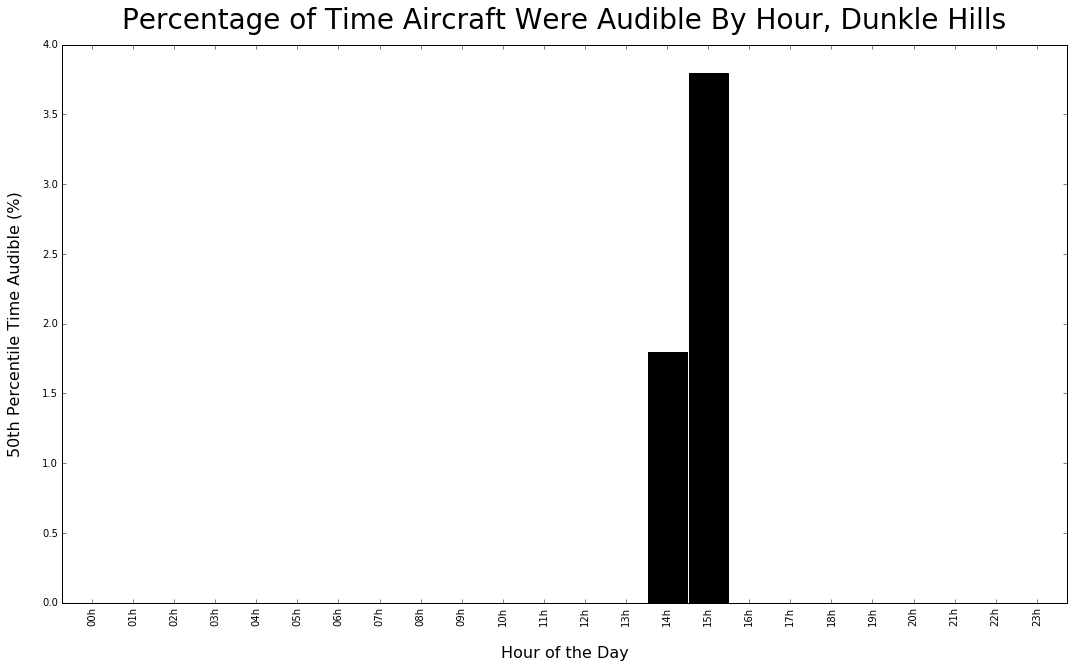

100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 31.06entries/s]


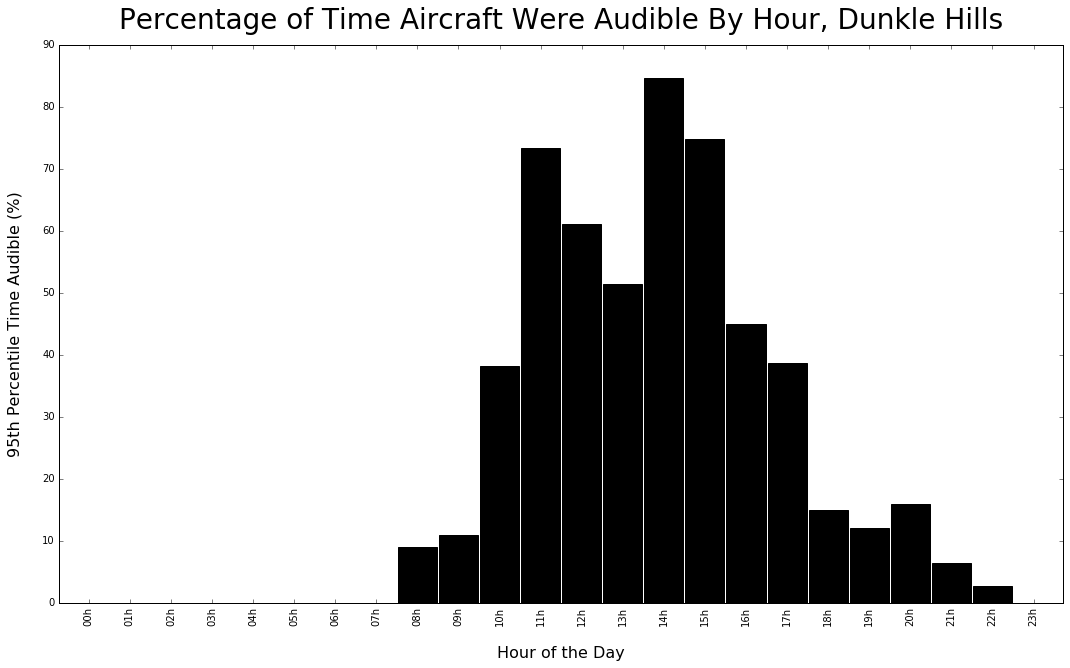

In [66]:
# plot for median percent time audible

site = "DUNK"
year = "2002"
dailypa = soundDB.dailypa(ds, site=site).combine()
toPlot = quantile_dailyPA(dailypa, 0.5, source="air")

f = plt.figure(figsize=(18, 10))

plt.title('Percentage of Time Aircraft Were Audible By Hour, ' + decoder[site], color='black', fontsize=28, position=(0.5,1.02))
toPlot.plot(kind='bar', y=toPlot, color="k", width=0.95)
plt.ylabel('50th Percentile Time Audible (%)', size = 16, labelpad=20)
plt.xlabel('Hour of the Day', size = 16, labelpad=20)
plt.show()

# or, what does the (hypothetically) 'worst' day look like?  90th percentile of all hours
toPlot = quantile_dailyPA(soundDB.dailypa(ds, site=site).combine(), 0.95)

f = plt.figure(figsize=(18, 10))

plt.title('Percentage of Time Aircraft Were Audible By Hour, ' + decoder[site], color='black', fontsize=28, position=(0.5,1.02))
toPlot.plot(kind='bar', y=toPlot, color="k", width=0.95)
plt.ylabel('95th Percentile Time Audible (%)', size = 16, labelpad=20)
plt.xlabel('Hour of the Day', size = 16, labelpad=20)
plt.show()

# f.savefig(r'C:\Users\Taylor Stinchcomb\Desktop\ICERD_HourlyPercentTimeAudibleAircraft.png', dpi=f.dpi,  bbox_inches='tight')

In [69]:
# what about amplitude?

site = "WEKH"

srcid = soundDB.srcid(ds, site=site).combine()

SEL50 = quantile_SEL(srcid, 0.5, source=1.2)
Lmax50 = quantile_Lmax(srcid, 0.5, source=1.2)
lnat = Lnat(soundDB.metrics(ds, site=site).combine())

print("median of", SEL50, "dBA SEL for propeller aircraft sources at", site)
print("median of", Lmax50, "dBA MaxSPL for propeller aircraft sources at", site +
      ", a level ~", int(pow(2, (Lmax50-lnat)/6.0)),"times as loud as the natural environment.")


100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.58entries/s]


median of 46.3 dBA SEL for propeller aircraft sources at WEKH
median of 30.2 dBA MaxSPL for propeller aircraft sources at WEKH, a level ~ 3 times as loud as the natural environment.


In [71]:
print("a prop-to-jet ratio of", propJetRatio(soundDB.srcid(ds, site=site).combine()), 
      "indicates about twice as many props as jets at", decoder[site])

100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 124.99entries/s]


a prop-to-jet ratio of 1.81538461538 indicates about twice as many props as jets at West Kantishna Hills


In [73]:
dailypa = soundDB.dailypa(ds, site=site).combine()

num_hours, perc = event_saturation(dailypa, start_hour = 0, end_hour = 23, source = 1.2)
print("Of the", num_hours, "hours sampled,", '{:.2f}'.format(perc) + 
      "%, (or " + str(int(num_hours*(perc/100)))+ " hours) have at least one propeller aircraft event.")

100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 17.54entries/s]


Of the 1176 hours sampled, 14.71%, (or 173 hours) have at least one propeller aircraft event.
